# Erdos-Renyi random networks

In [1]:
import random

import networkx as nx
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

sb.set_theme(style="ticks", context="notebook")

## Write a random graph generator

In [2]:
def random_graph(N, p):
    
    G = nx.Graph()
    
    nodes = range(N)
    edges = []
    
    for i in nodes:
        for j in nodes[:i]:
            if random.random() < p:
                edges.append([i,j])
                
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    
    return G

In [3]:
N = 100
p = 1 / N
G = random_graph(N, p)

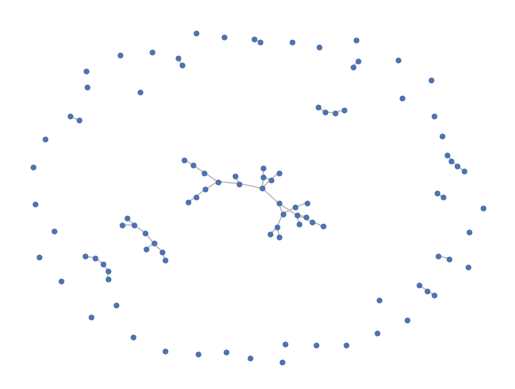

In [4]:
params = {
    "node_size": 10,
    "with_labels": False,
    "edge_color": "silver",
    "node_color": "b",
}

nx.draw_networkx(G, **params)

sb.despine(bottom=True, left=True)

## Analyse characteristics

In [5]:
N = 200
p = 0.2/N

G = nx.erdos_renyi_graph(N, p, seed=1)

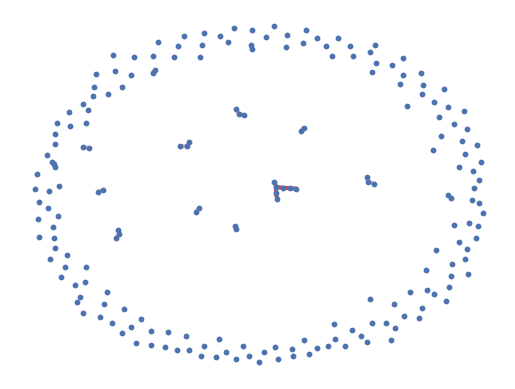

In [6]:
params = {
    "node_size": 10,
    "with_labels": False,
    "edge_color": "silver",
    "node_color": "b",
}

pos = nx.spring_layout(G)

nx.draw_networkx(G, pos=pos, **params)

# identify largest connected component
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
# highlight largest connected component
nx.draw_networkx_edges(G0, pos=pos, width=3.0, edge_color="r")

# draw other connected components
for Gi in Gcc[1:]:
    if len(Gi) > 1:
        nx.draw_networkx_edges(G.subgraph(Gi), pos, alpha=0.4, width=3.0, edge_color="r")


sb.despine(bottom=True, left=True)

In [7]:
print(f"Connected: {nx.is_connected(G)}")
print(f"# connected components: {len(list(nx.connected_components(G)))}")

print()
print(f"Size of largest connected component: {len(G0)}")
print(f"Prop. of nodes in it: {len(G0) / N:.2f}")

print()
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
print(f"Average degree: {np.average(degree_sequence)}")
print(f"Clustering coefficient: {nx.average_clustering(G)}")

Connected: False
# connected components: 177

Size of largest connected component: 7
Prop. of nodes in it: 0.04

Average degree: 0.23
Clustering coefficient: 0.0


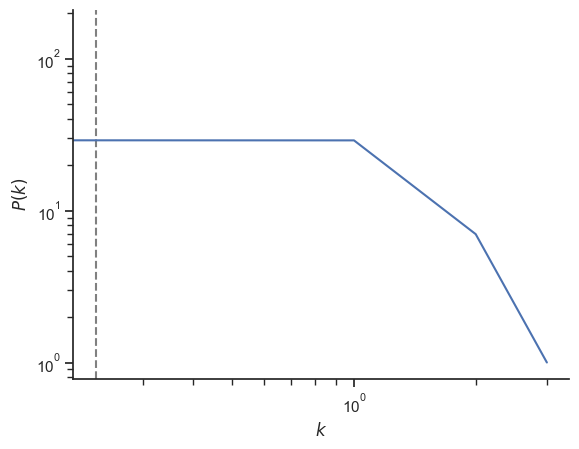

In [8]:
deg, counts = np.unique(degree_sequence, return_counts=True)

fig, ax = plt.subplots()

ax.plot(deg, counts)

ax.axvline(np.average(degree_sequence), ls="--", c="grey", zorder=-1)

ax.set_xlabel("$k$")
ax.set_ylabel("$P(k)$")
plt.yscale("log")
plt.xscale("log")

sb.despine()

## Vary the degree k 

In [39]:
N = 500  # number of nodes

ks = np.arange(0, 5.1, 0.1)  # avg degrees
ps = ks / (N - 1)  # corresponding wiring probabilities

n_reps = 10

# props = []
props_arr = np.zeros((len(ps), n_reps))

for i, p in enumerate(ps):
    for rep in range(n_reps):

        G = nx.erdos_renyi_graph(n=N, p=p)

        # identify largest connected component
        Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        G0 = G.subgraph(Gcc[0])

        prop = len(G0) / N
        props_arr[i, rep] = prop

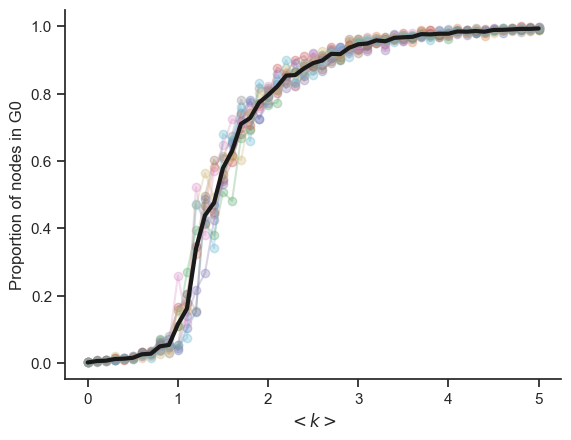

In [40]:
fig, ax = plt.subplots()

ax.plot(ks, props_arr, "-o", alpha=0.3)

ax.plot(ks, np.average(props_arr, axis=1), "k-", lw=3)

ax.set_ylabel("Proportion of nodes in G0")
ax.set_xlabel(r"$< k >$")

sb.despine()

## Configuration model

In [84]:
N = 20
p = 6 / N
G = random_graph(N, p)

degree_sequence = [d for n, d in G.degree()]

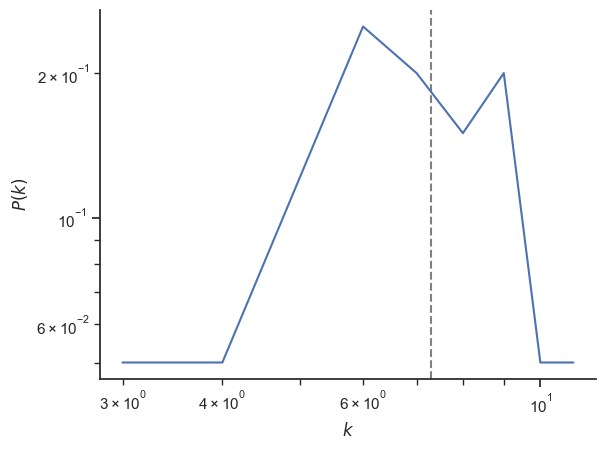

In [85]:
deg, counts = np.unique(degree_sequence, return_counts=True)

fig, ax = plt.subplots()
ax.plot(deg, counts / N)
ax.axvline(np.average(degree_sequence), ls="--", c="grey", zorder=-1)

ax.set_xlabel("$k$")
ax.set_ylabel("$P(k)$")
plt.yscale("log")
plt.xscale("log")

sb.despine()

In [133]:
G_conf = nx.configuration_model(degree_sequence)
G_conf = nx.Graph(G_conf)

degree_sequence_conf = [d for n, d in G.degree()]

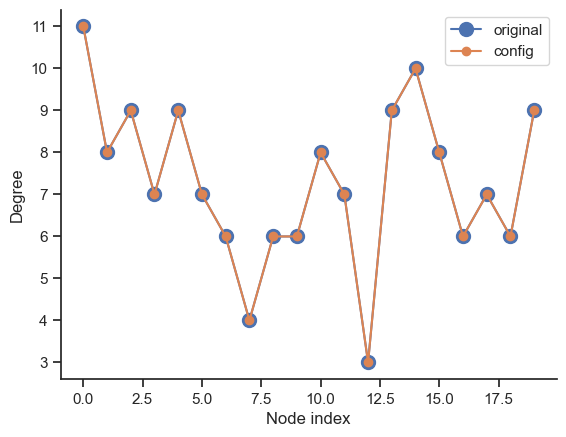

In [134]:
deg_conf, counts_conf = np.unique(degree_sequence_conf, return_counts=True)

fig, ax = plt.subplots()
ax.plot(degree_sequence, "o-", ms=10, label="original")
ax.plot(degree_sequence_conf, "o-", label="config")

ax.set_xlabel("Node index")
ax.set_ylabel("Degree")
#plt.yscale("log")
#plt.xscale("log")

ax.legend()

sb.despine()

In [135]:
print(G)
print(G_conf)

Graph with 20 nodes and 73 edges
Graph with 20 nodes and 63 edges


In [100]:
pos = nx.spring_layout(G)

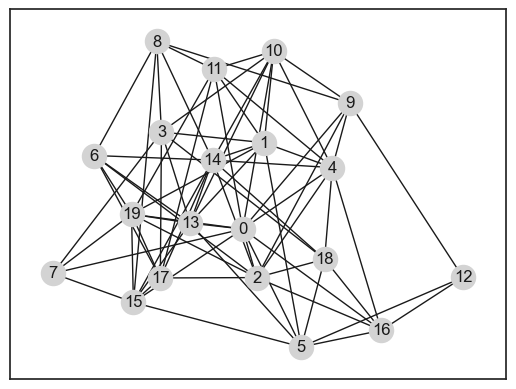

In [136]:
pos = nx.spring_layout(G, seed=1)
nx.draw_networkx(G, pos=pos, node_color="lightgrey")

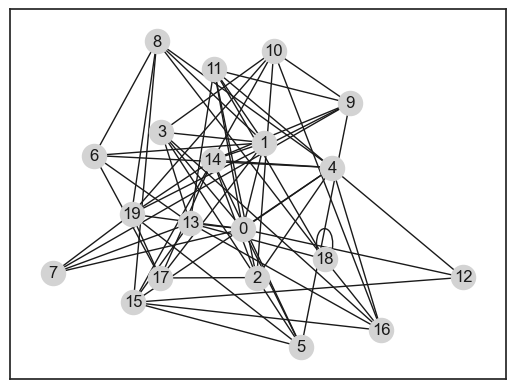

In [137]:
nx.draw_networkx(G_conf, pos=pos, node_color="lightgrey")

In [138]:
#G_conf = G_conf.remove_edges_from(nx.selfloop_edges(G_conf))